# Projekat iz predmeta Osnovi Računarske Inteligencije

#### Problem koji se rešava je predikcija potrošnje automobila, odnosno predikcija mpg(miles per gallon) na osnovu sledećih atributa:
    1. Broj cilindara
    2. Prenos
    3. Broj konjskih snaga
    4. Težina
    5. Ubrzanje
    6. Godina proizvodnje
    7. Poreklo (1 - Amerika, 2 - Evropa, 3 - Azija)
    8. Naziv automobila
    
#### Dataset: https://www.kaggle.com/uciml/autompg-dataset

#### Broj instanci: 398

#### Broj atributa: 9

### Algoritmi koji su korišćeni:
#####    1. Multivariate Linear Regression
      Regresija ima za cilj da pronađe funkciju koja se “najbolje uklapa” u podatke uz
      pretpostavku da rezultujuća funkcija ne mora da prođe kroz svaku tačku.
#####    2. Ridge Regression 
      Varijacija obične regresije. Korisna ukoliko dataset sadrži outlier-e, koji kvare model.
      Problem rešava dodavanjem kvadrirane norme težina na funkciju greške.
#####    3. Lasso Regression 
      Varijacija obične regresije. Korisna ukoliko dataset ima mali broj nezavisnih promenljivih,
      ali velik broj tačaka. Problem rešava dodavanjem norme težina na funkciju greške.
#####    4. ElasticNet Regression
      Predstavlja kombinaciju Ridge i Lasso regresije.

$$ \textbf{Multivariate Linear Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} =  \sum_{i=1}^{N} (y_{i} - w^\top x_{i})^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ \frac{\partial E}{\partial w_{j}} = \sum_{i=1}^N 2(y_{i} - w^\top x_{i})(-x_{ij}) = 0, \ i - red, \ j - kolona(nezavisna \ promenljiva) $$

$$ w^\top \sum_{i=1}^N x_{i}x_{ij} = \sum_{i=1}^N y_{i}x_{ij} $$

$$ w^\top(X^\top X) = y^\top X $$

$$ \bigg[w^\top(X^\top X)\bigg]^\top = \bigg[y^\top X\bigg]^\top$$

$$ (X^\top X)w = X^\top y$$

$$ w = (X^\top X)^{-1}X^\top y $$

$$ \textbf{Ridge Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w|^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ |w|^{2} = w^\top w = w_{1}^{2} + w_{2}^{2} + ... + w_{i}^{2}, \ w - vektor \ težina, \ \lambda - proizvoljan \ parametar $$

$$ \textbf{Matrix form of Error function}: $$

$$ E = (y - Xw)^\top (y - Xw) + \lambda w^\top w $$

$$ E = y^\top y - 2y^\top Xw + w^\top X^\top Xw + \lambda w^\top w $$

$$ \frac{\partial E}{\partial w} = -2X^\top y + 2X^\top Xw + 2 \lambda w = 0 $$

$$ w = (\lambda I + X^\top X)^{-1}X^\top y $$

$$ \textbf{Lasso Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w|,\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ \textbf{Matrix form of Error function}: $$

$$ E = (y - Xw)^\top (y - Xw) + \lambda w$$

$$ E = y^\top y - 2y^\top Xw + w^\top X^\top Xw + \lambda |w| $$
$$ \frac{\partial E}{\partial w} = -2X^\top y + 2X^\top Xw + \lambda sign(w) = 0 $$

$$ sign(x) = 
     \begin{cases}
        1 &\quad\text{if x > 0} \\
       -1 &\quad\text{if x < 0}\\
        0 &\quad\text{if x = 0}\\
     \end{cases} $$
     
$$ \text{Iz prethodne formule w ne može da se izrazi, pa se ovaj problem rešava Gradient Descent algoritmom} $$

$$ \textbf{ElasticNet Regression: } $$

$$ \textbf{Error function:} \ E = \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2} + \lambda \ |w| + \lambda |w|^{2},\ y_{i} - stvarna \ vrednost, \ \hat{y_{i}} - predikcija $$

$$ |w|^{2} = w^\top w = w_{1}^{2} + w_{2}^{2} + ... + w_{i}^{2}, \ w - vektor \ težina, \ \lambda - proizvoljan \ parametar $$

$$\text{Predikcija se u svakom od prethodnih modela dobija sledećom formulom} $$


$$\textbf{Regression model: } \hat{y} = w^\top X, \ \hat{y} - vektor \ predikcija, \ w - težine $$

### Za evaluaciju modela korišćene su sledeće metrike:
    1. Coefficient of determination (R Squared) - najbolji mogući rezultat je 1.0, može biti i negativan
    2. Mean Absolute Error - što je manja vrednost, model je bolji
    3. Explained Variance Score - najbolji mogući rezultat je 1.0, što je manji model je lošiji

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Za dalju analizu zanemariću naziv automobila, a iz tabele dole se vidi da fali horsepower kolona

In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Vrednosti u horsepower koloni su stringovi pa ih treba konvertovati u broj

In [5]:
type(df.horsepower[0])

str

In [6]:
df = df[df.horsepower != '?']
df.horsepower = df.horsepower.astype('float64')

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Vizualizacija

Vizualizacija matrice korelacije



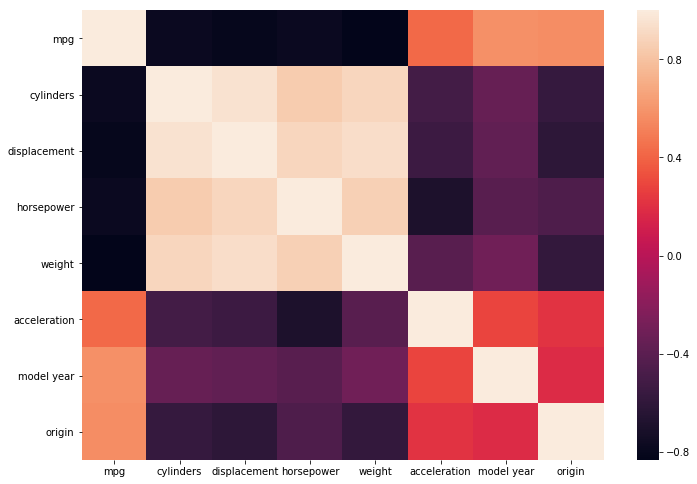

In [9]:
correlation = df.corr(method = 'pearson')

dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = dims)

sns.heatmap(ax = ax, data = correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
print('Vizualizacija matrice korelacije\n')

In [10]:
labels = np.array(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
stats = correlation.mpg
stats = stats[1 : len(stats)]

In [11]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats,[stats[0]]))
angles = np.concatenate((angles,[angles[0]]))
stats = abs(stats)

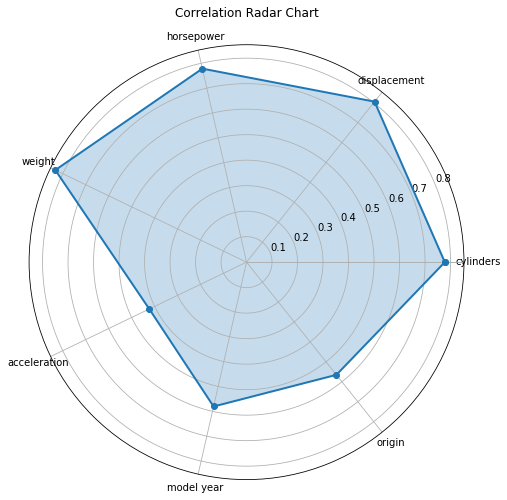

In [12]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, polar = True)   
ax.plot(angles, stats, 'o-', linewidth = 2) 
ax.fill(angles, stats, alpha = 0.25)  
ax.set_thetagrids(angles * 180/np.pi, labels)  
ax.set_title('Correlation Radar Chart')
ax.grid(True)

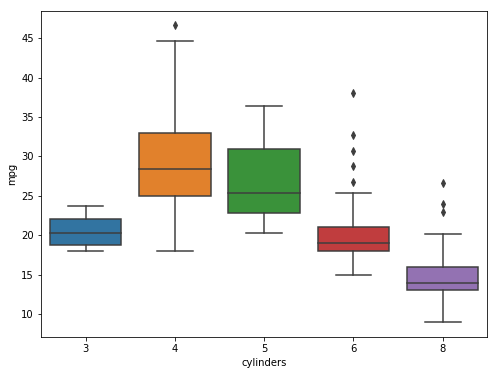

In [13]:
dims = (8, 6)
data = df[['cylinders', 'mpg']]
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'cylinders', y='mpg', data = data)
print()

Na prethodnom boxplotu se vidi uticaj broja cilindara na potrošnju, odnosno što je broj cilindara veći, mpg će biti manji, odnosno potrošnja će biti veća, što opravdava negativna korelacija imeđu ova dva atributa.

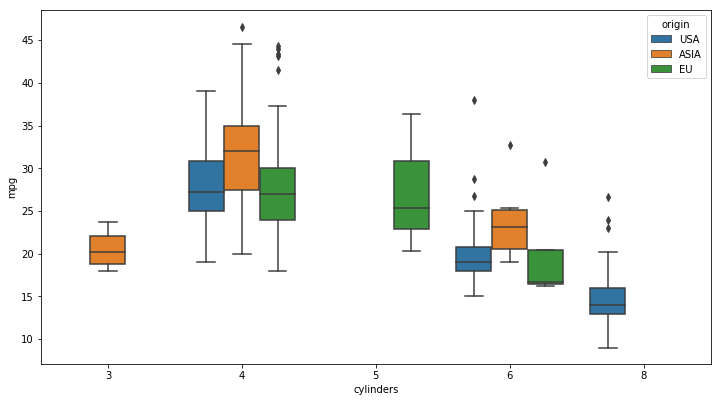

In [14]:
dims = (12, 6.5)
data = df[['cylinders', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'cylinders', y = 'mpg', hue = 'origin', data = data)
print()

Ukoliko se boxplot podeli po regionima, vidimo da za automobile proizvedene u Americi važi isti trend, kako je broj cilindara veći, veća je i potrošnja. Za automobile proizvedene u Evropi se može isto reći, ali ne prate u potpunosti taj trend, dok za automobile proizvedene u Aziji grafik jasno pokazuje da prethodno pravilo ne važi.

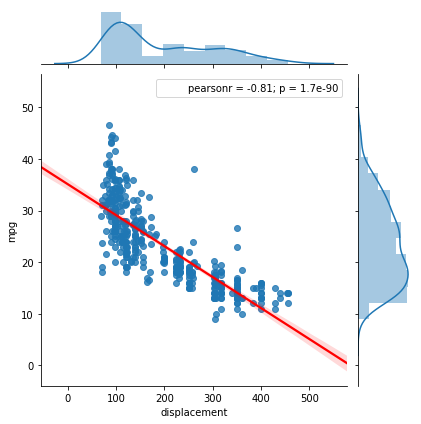

In [15]:
data = df[['displacement', 'mpg']]
g = sns.jointplot(x = 'displacement', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

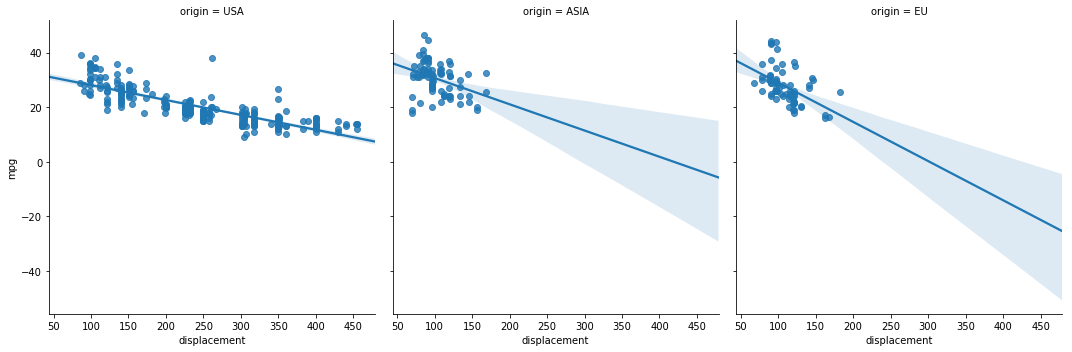

In [16]:
data = df[['displacement', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'displacement', y = 'mpg', col = 'origin', data = data,  aspect = 1);

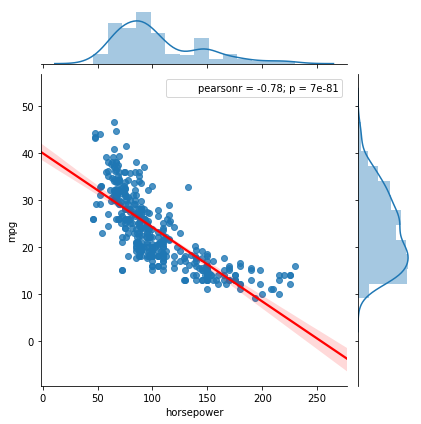

In [17]:
data = df[['horsepower', 'mpg']]
g = sns.jointplot(x = 'horsepower', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

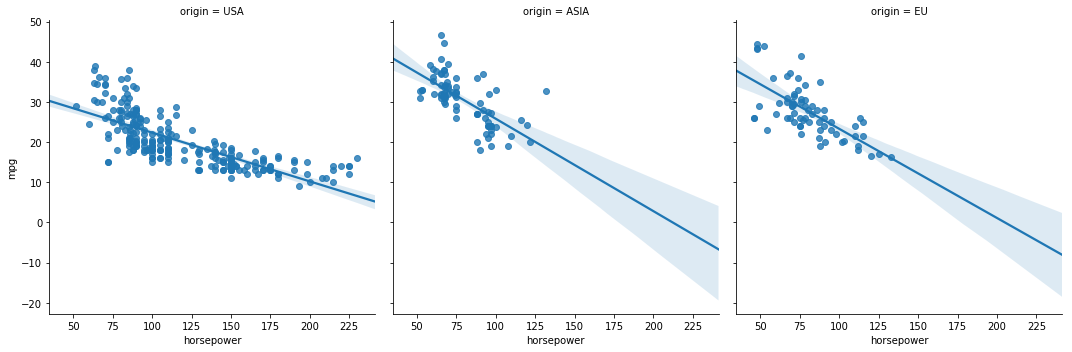

In [18]:
data = df[['horsepower', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'horsepower', y = 'mpg', col = 'origin', data = data,  aspect = 1);

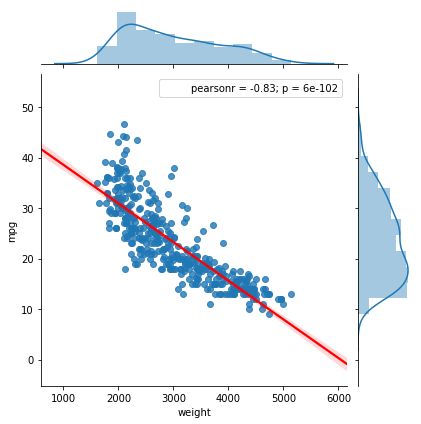

In [19]:
data = df[['weight', 'mpg']]
g = sns.jointplot(x = 'weight', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

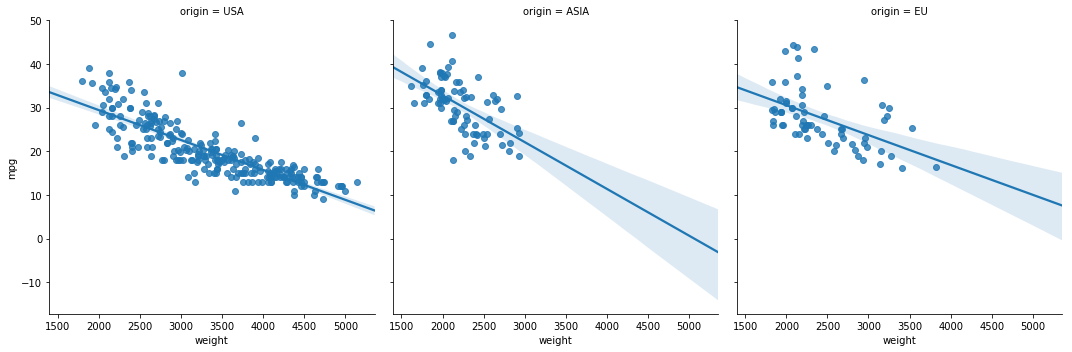

In [20]:
data = df[['weight', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'weight', y = 'mpg', col = 'origin', data = data,  aspect = 1);

Prethodni grafici pokazuju jaku korelaciju između potrošnje i prenosa, broja konjskih snaga i težine automobila,
što su ti atributi veći veća je i potrošnja automobila. 

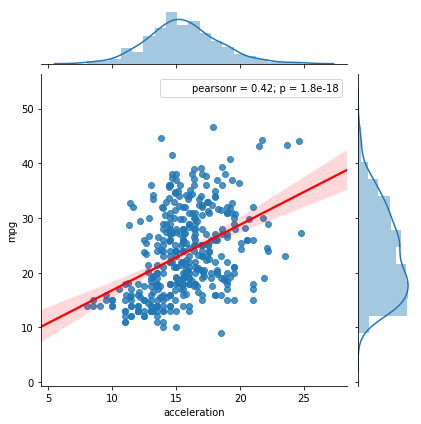

In [21]:
data = df[['acceleration', 'mpg']]
g = sns.jointplot(x = 'acceleration', y = 'mpg', 
                  data = data, kind = 'reg',
                  joint_kws = {'line_kws':{'color':'red'}})
print()

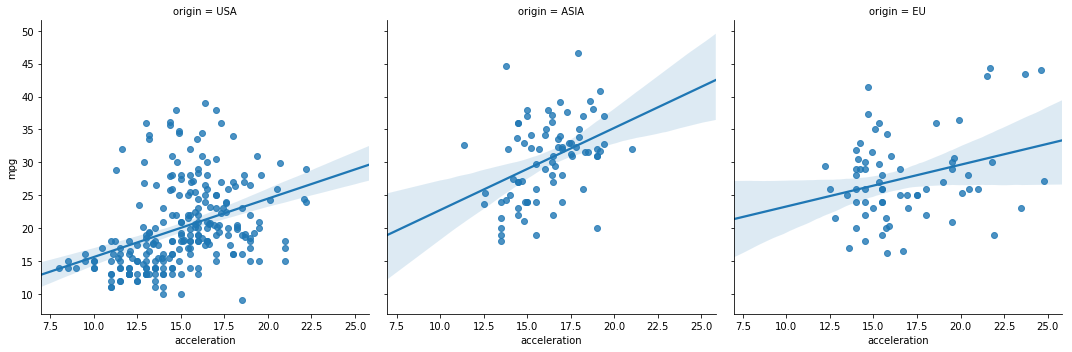

In [22]:
data = df[['acceleration', 'mpg', 'origin']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
sns.lmplot(x = 'acceleration', y = 'mpg', col = 'origin', data = data,  aspect = 1);

Iz prethodnog grafika se vidi slaba linearna zavnisnost između potrošnje i ubrzanja.

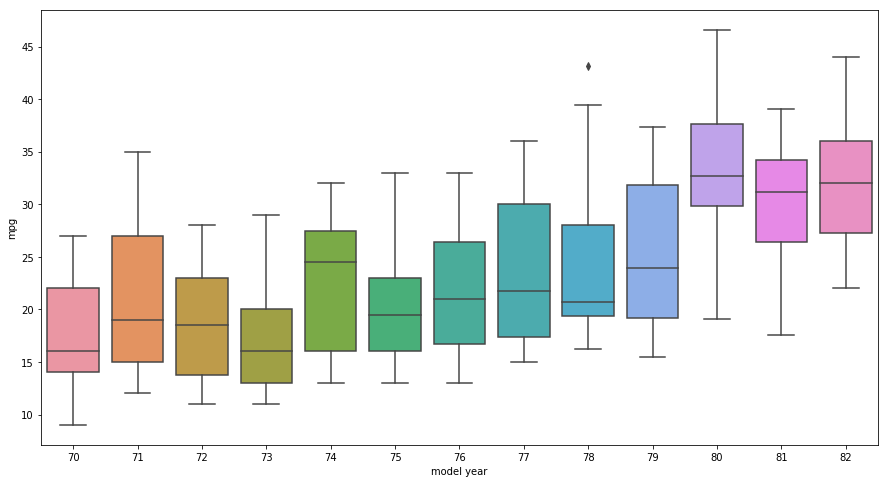

In [23]:
dims = (15, 8)
data = df[['model year', 'mpg']]
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'model year', y = 'mpg', data = data)
print()

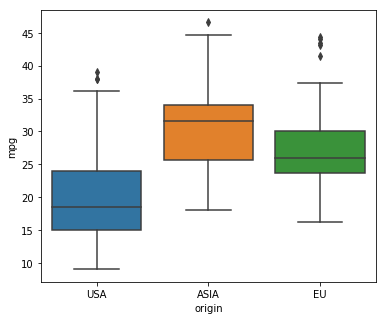

In [24]:
dims = (6, 5)
data = df[['origin', 'mpg']]
data.origin.replace((1, 2, 3), ('USA', 'EU', 'ASIA'), inplace = True)
fig, ax = plt.subplots(figsize = dims)
sns.boxplot(ax = ax, x = 'origin', y = 'mpg', data = data)
print()

Ovaj boxplot pokazuje da američki automobili troše najviše, a Azijski najmanje.

MPG Histogram


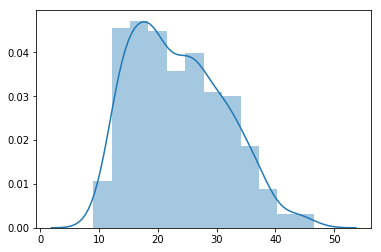

In [25]:
sns.distplot(df.iloc[:, 0].values)
print('MPG Histogram')

Cylinders Histogram


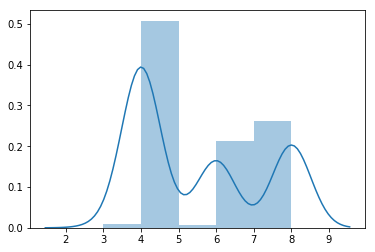

In [26]:
sns.distplot(df.iloc[:, 1].values)
print('Cylinders Histogram')

Displacement Histogram


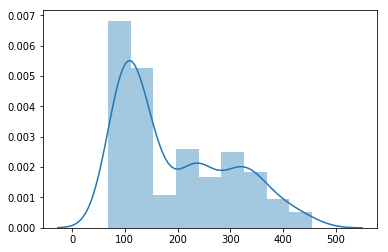

In [27]:
sns.distplot(df.iloc[:, 2].values)
print('Displacement Histogram')

Horsepower Histogram


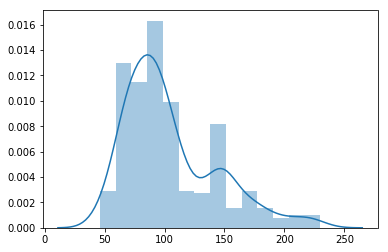

In [28]:
sns.distplot(df.iloc[:, 3].values)
print('Horsepower Histogram')

Weight Histogram


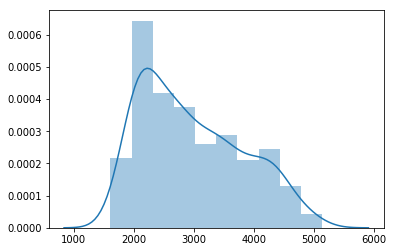

In [29]:
sns.distplot(df.iloc[:, 4].values)
print('Weight Histogram')

Acceleration Histogram


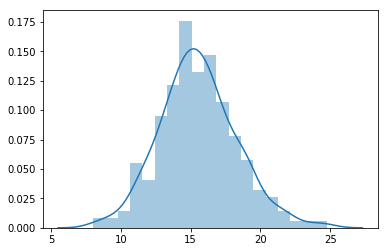

In [30]:
sns.distplot(df.iloc[:, 5].values)
print('Acceleration Histogram')

Model Year Histogram


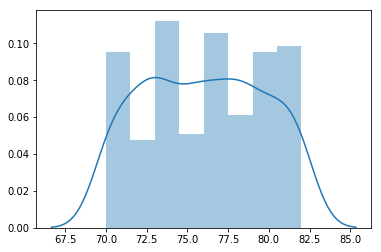

In [31]:
sns.distplot(df.iloc[:, 6].values)
print('Model Year Histogram')

Origin Histogram


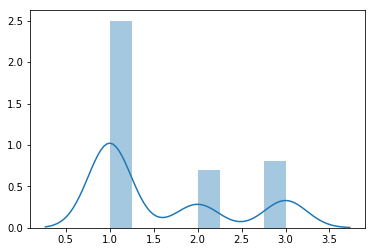

In [32]:
sns.distplot(df.iloc[:, 7].values)
print('Origin Histogram')

### Predikcija koristeći sve nezavisne promenjive sem poslednje - naziv automobila

In [33]:
import stats
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [34]:
for i in range(0, X.shape[1]):
    print('Correlation between Y and X{} is {}'.format(i+1,
          stats.get_pearson_corr(y.tolist(), X[:, i].tolist())))

Correlation between Y and X1 is -0.7776175081260218
Correlation between Y and X2 is -0.8051269467104581
Correlation between Y and X3 is -0.7784267838977751
Correlation between Y and X4 is -0.8322442148315757
Correlation between Y and X5 is 0.4233285369027873
Correlation between Y and X6 is 0.580540966090785
Correlation between Y and X7 is 0.5652087567164613


In [35]:
X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from linear_model import LinearRegression, Ridge, Lasso, ElasticNet

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

In [37]:
for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8137427516623791 MAE: 0.30964832158846334 R^2: 0.8118881423003085
Ridge => EVS: 0.7867401491718748 MAE: 0.3289504822276145 R^2: 0.7827038041355148
Lasso => EVS: 0.8184592376795357 MAE: 0.3031121973824228 R^2: 0.815962752401986
ElasticNet => EVS: 0.7866621365697195 MAE: 0.3291284375299192 R^2: 0.7826090812371732


### Predikcija koristeći samo dve nezavisne promenjive - težina i godina proizvodnje
Na ovom primeru vidi se da se postiže veća preciznost sa samo dve nezavisne promenljive, za razliku od prethodnog primera gde su korišćene sve nezavisne promenljive, osim naziva automobila

In [38]:
X = df.iloc[:, [4,6]].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8168479801268531 MAE: 0.3151727109945979 R^2: 0.8150789318775375
Ridge => EVS: 0.8129433082627084 MAE: 0.30506350356896544 R^2: 0.8111124366647706
Lasso => EVS: 0.8241103608021633 MAE: 0.30482051350375394 R^2: 0.8221384067005659
ElasticNet => EVS: 0.8131265417767104 MAE: 0.3046368490788623 R^2: 0.8112747841787118


### Predikcija za automobile Americkih proizvođača

In [39]:
usa = df.loc[df['origin'] == 1]

In [40]:
X = usa.iloc[:, 1 : 7].values.astype('float64')
y = usa.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.8831196284652548 MAE: 0.25063561320840566 R^2: 0.8825896017666394
Ridge => EVS: 0.8301534298422119 MAE: 0.3129163541154436 R^2: 0.8293606768168369
Lasso => EVS: 0.856982940695845 MAE: 0.2815693526819009 R^2: 0.8567918882163079
ElasticNet => EVS: 0.8304954788269596 MAE: 0.3126445636245125 R^2: 0.8297121464096395


Nakon podele dataseta na osnovu porekla automobila, vidimo da je za automobile proizvedene u Americi predikcija znatno bolja u poređenju sa predikcijom koja je izvšena nad celim datasetom.

### Predikcija za automobile Evropskih proizvođača

In [41]:
europe = df.loc[df['origin'] == 2]

In [42]:
X = europe.iloc[:, 1 : 7].values.astype('float64')
y = europe.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5098774688575416 MAE: 0.6233861518595981 R^2: 0.5082449437063821
Ridge => EVS: 0.45323910997516825 MAE: 0.6217196117618976 R^2: 0.4508153742709565
Lasso => EVS: 0.5439913018999465 MAE: 0.5930369542384242 R^2: 0.542840535334427
ElasticNet => EVS: 0.4544274309247006 MAE: 0.6211638811723992 R^2: 0.4520049068436055


### Predikcija za automobile Azijskih proizvođača

In [43]:
asia = df.loc[df['origin'] == 3]

In [44]:
X = asia.iloc[:, 1 : 7].values.astype('float64')
y = asia.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5676383330883727 MAE: 0.474171672610692 R^2: 0.5676096725465458
Ridge => EVS: 0.48146943660348496 MAE: 0.5681333649478454 R^2: 0.47967239260830485
Lasso => EVS: 0.5240626064573557 MAE: 0.515094787682838 R^2: 0.524033230415099
ElasticNet => EVS: 0.4820704073185218 MAE: 0.5679631396354202 R^2: 0.48035543887222887


Prilikom predikcije za automobile proizvedene u Evropi i Aziji dobijaju se dosta lošiji rezultati, za razliku od automobila koji su proizvedeni u Americi.

### Analiza uticaja pojedinačnih atributa na predikciju

In [45]:
X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')

X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### MPG - Cylinders

In [46]:
X, y = stats.standardize(X, y)
X_train, X_test, y_train, y_test = train_test_split(X[:, [0]], y, test_size=0.3, random_state=42)

In [47]:
for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.5668336933462839 MAE: 0.4873278266011343 R^2: 0.5587622965963118
Ridge => EVS: 0.556768608127677 MAE: 0.49673037703145456 R^2: 0.5500064945189098
Lasso => EVS: 0.5722772516515706 MAE: 0.484394749163381 R^2: 0.5644358816852179
ElasticNet => EVS: 0.5571106558861224 MAE: 0.4965091610095421 R^2: 0.5503414740400894


#### MPG - Displacement

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [1]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.6037855321212591 MAE: 0.4834732835407762 R^2: 0.5921166112880016
Ridge => EVS: 0.6059931744546936 MAE: 0.46286713021791176 R^2: 0.596899982641425
Lasso => EVS: 0.6124941137459282 MAE: 0.47362460989295585 R^2: 0.6012657119709192
ElasticNet => EVS: 0.6063395766171022 MAE: 0.46271082755014303 R^2: 0.5972321423304775


#### MPG - Horsepower

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [2]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.55011528816607 MAE: 0.5095248964223428 R^2: 0.5432002403224394
Ridge => EVS: 0.5602514558209142 MAE: 0.5059906030722556 R^2: 0.554293546067977
Lasso => EVS: 0.5601166099409893 MAE: 0.5044721261317947 R^2: 0.5533668083468993
ElasticNet => EVS: 0.5605318448221897 MAE: 0.5058721368251349 R^2: 0.5545686701534762


#### MPG - Weight

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [3]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.6798480346210569 MAE: 0.42683343779674116 R^2: 0.6728137524031409
Ridge => EVS: 0.6762705980178316 MAE: 0.40891007137410523 R^2: 0.6702364097294837
Lasso => EVS: 0.6883869090251569 MAE: 0.41743677803013185 R^2: 0.6815160971565097
ElasticNet => EVS: 0.6767035066081235 MAE: 0.40862418732137606 R^2: 0.6706634924367252


#### MPG - Acceleration

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [4]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.13520363432268256 MAE: 0.7161943929770985 R^2: 0.13047936255853188
Ridge => EVS: 0.13562581784543704 MAE: 0.7242573266663124 R^2: 0.1311617432371277
Lasso => EVS: 0.13785844667472613 MAE: 0.7171194013704604 R^2: 0.13321462173296794
ElasticNet => EVS: 0.13559121134662955 MAE: 0.7242971083836421 R^2: 0.13112790844911004


#### MPG - Model Year

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [5]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.33778607294684304 MAE: 0.6483234641646715 R^2: 0.33777103535545605
Ridge => EVS: 0.33436930288545996 MAE: 0.6593407737219322 R^2: 0.3341734815344114
Lasso => EVS: 0.3429629649609607 MAE: 0.6496030463599737 R^2: 0.3429629261515389
ElasticNet => EVS: 0.33421581625073804 MAE: 0.659397230945727 R^2: 0.3340179364288579


#### MPG - Origin

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X[:, [6]], y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train, X_test, y_test)
    predictions = model.predict()
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
    
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared)
    print(msg)

LinearRegression => EVS: 0.3013769901082649 MAE: 0.6168745306970007 R^2: 0.2937710085485875
Ridge => EVS: 0.2929112562453796 MAE: 0.6352353210210605 R^2: 0.2864536220355096
Lasso => EVS: 0.3039380913936044 MAE: 0.6207775885320207 R^2: 0.2966089695413725
ElasticNet => EVS: 0.2927753074352525 MAE: 0.6353354841491907 R^2: 0.28632208751649


Iz prethodnih analize, vidi se da atribut koji ima najviše uticaja na MPG je težina automobila, zatim prenos, i posle toga broj konjskih snaga i broj cilindara otrpilike podjednako utiču na predikciju

### Boosting Algoritmi

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:, 1 : 8].values.astype('float64')
y = df.iloc[:, 0].values.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
models = []
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('Bagging', BaggingRegressor()))
models.append(('ExtraTree', ExtraTreesRegressor()))
models.append(('GradientBoosting', GradientBoostingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))

def get_feature_importance_plot(model, name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)
    
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances for {}".format(name))
    plt.bar(range(X.shape[1]), importances[indices], color="m", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    print(max(importances))
    plt.text(4.9,max(importances),'0 - Cylinders')
    plt.text(4.9,max(importances)-0.02,'1 - Displacement')
    plt.text(4.9,max(importances)-0.04,'2 - Horsepower')
    plt.text(4.9,max(importances)-0.06,'3 - Weight')
    plt.text(4.9,max(importances)-0.08,'4 - Acceleration')
    plt.text(4.9,max(importances)-0.1,'5 - Model Year')
    plt.text(4.9,max(importances)-0.12,'6 - Origin')
    plt.show()

AdaBoost => EVS: 0.8498132651332051 MAE: 2.2771253963537066 R^2: 0.8255686863029912
AdaBoost features:
[0.0119012  0.18563265 0.18628673 0.36167188 0.02528824 0.22374198
 0.00547732]

0.36167188287912827


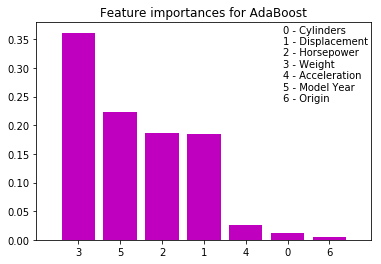

Bagging => EVS: 0.8316422414621063 MAE: 2.296186440677966 R^2: 0.8174993928230332
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.8659811197183562 MAE: 1.9230508474576276 R^2: 0.8510488432822322
ExtraTree features:
[0.2744354  0.20567897 0.10509771 0.25548917 0.02858781 0.11608299
 0.01462795]

0.27443539907311987


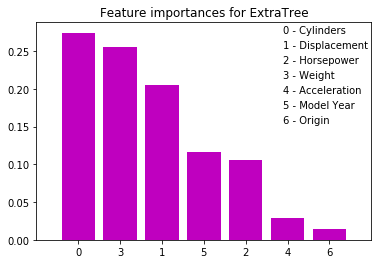

GradientBoosting => EVS: 0.8591447549607028 MAE: 1.979817391157724 R^2: 0.8507707874384802
GradientBoosting features:
[0.03780532 0.17023496 0.18924428 0.26244078 0.18475284 0.13634871
 0.01917312]

0.2624407758522248


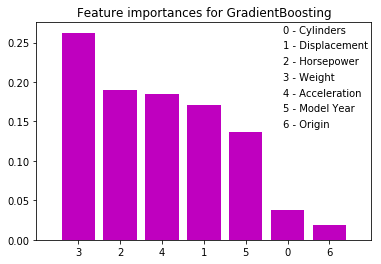

RandomForest => EVS: 0.8366820137763434 MAE: 2.1165254237288136 R^2: 0.8269730400666208
RandomForest features:
[0.24255014 0.2868209  0.20478095 0.13236171 0.02187863 0.10870605
 0.00290162]

0.28682089522524085


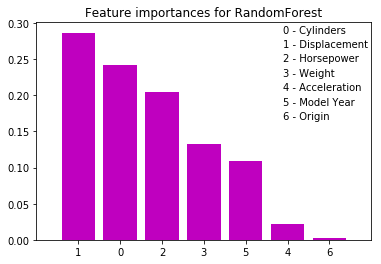

In [56]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Primenom boosting algoritama dobijaju se dosta bolji rezultati nego primenom klasičnih regresionih metoda.

Na graficima se vidi koji atributi su imali najveći uticaj na predikciju.

Vrednosti uticaja atributa na predikciju su pozitivni i njihov zbir je 1. Što je veća vrednost, to je veći uticaj atributa na predikciju.

### Predikcija za automobile Americkih proizvođača - Boosting Algoritmi

In [57]:
def get_feature_importance_plot_origin(model, name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)
    
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances for {}".format(name))
    plt.bar(range(X.shape[1]), importances[indices], color="m", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    print(max(importances))
    plt.text(4.1,max(importances),'0 - Cylinders')
    plt.text(4.1,max(importances)-0.02,'1 - Displacement')
    plt.text(4.1,max(importances)-0.04,'2 - Horsepower')
    plt.text(4.1,max(importances)-0.06,'3 - Weight')
    plt.text(4.1,max(importances)-0.08,'4 - Acceleration')
    plt.text(4.1,max(importances)-0.1,'5 - Model Year')
    plt.show()

AdaBoost => EVS: 0.900293275831689 MAE: 1.4721203954806505 R^2: 0.8974194679260201
AdaBoost features:
[0.00703937 0.27011582 0.11670513 0.33333286 0.02673283 0.246074  ]

0.3333328552304733


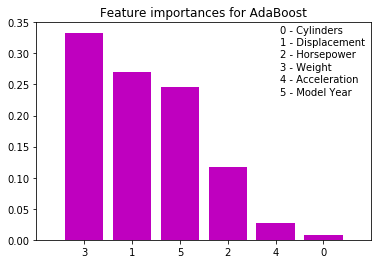

Bagging => EVS: 0.890415920085827 MAE: 1.5848648648648647 R^2: 0.8888332937075569
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.904929565005902 MAE: 1.5139189189189188 R^2: 0.9033417567711968
ExtraTree features:
[0.53983448 0.13801747 0.06236397 0.11970039 0.03248261 0.10760107]

0.5398344841059968


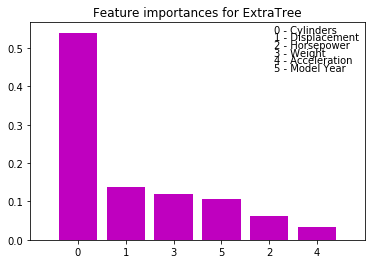

GradientBoosting => EVS: 0.9119946317641257 MAE: 1.3673941210021305 R^2: 0.9105630328560854
GradientBoosting features:
[0.00283137 0.18901338 0.19665609 0.28782991 0.19813825 0.125531  ]

0.28782990538216874


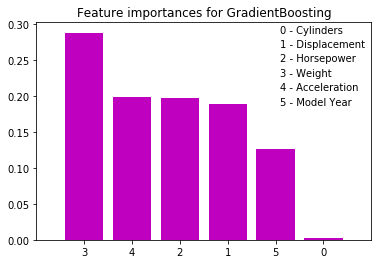

RandomForest => EVS: 0.9160946089448733 MAE: 1.468648648648649 R^2: 0.9145802646882668
RandomForest features:
[0.00364562 0.18926894 0.09677012 0.58362449 0.03259593 0.0940949 ]

0.5836244879728055


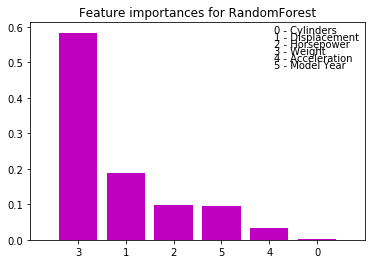

In [58]:
usa = df.loc[df['origin'] == 1]

X = usa.iloc[:, 1 : 7].values.astype('float64')
y = usa.iloc[:, 0].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot_origin(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Kao i prilikom upotrebe klasičnih regresionih metoda, na podskupu dataset-a
koji se odnosi samo na američke proizvođače rezultati su bolji nego na celom dataset-u

### Predikcija za automobile Evropskih proizvođača - Boosting Algoritmi

AdaBoost => EVS: 0.776664284174549 MAE: 2.542735749700035 R^2: 0.7718109695527815
AdaBoost features:
[0.00306057 0.09262314 0.38944661 0.10233025 0.08387252 0.3286669 ]

0.38944660812609244


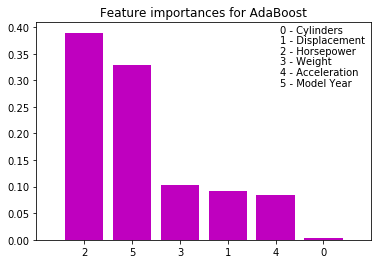

Bagging => EVS: 0.7025652136113414 MAE: 3.0504761904761906 R^2: 0.7020493314934297
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.744527383982479 MAE: 2.7576190476190474 R^2: 0.7272482787898071
ExtraTree features:
[0.00403252 0.10956688 0.33641769 0.11728764 0.04515089 0.38754438]

0.38754437775112516


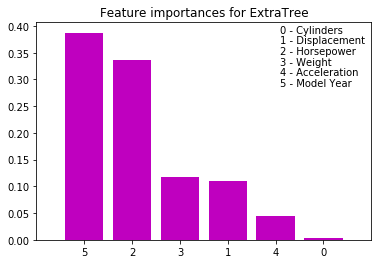

GradientBoosting => EVS: 0.7232413596019233 MAE: 2.982007215395516 R^2: 0.7096251712182319
GradientBoosting features:
[0.02879762 0.1459689  0.16441902 0.31892521 0.12897518 0.21291408]

0.31892520828383086


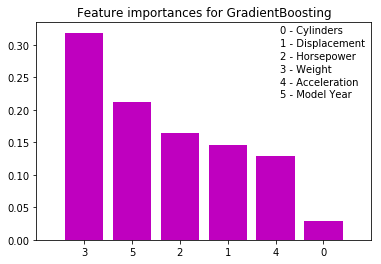

RandomForest => EVS: 0.6070491742630519 MAE: 3.5071428571428576 R^2: 0.6031605479386173
RandomForest features:
[0.00425646 0.04713016 0.37767073 0.11379394 0.09953619 0.35761252]

0.37767072893271586


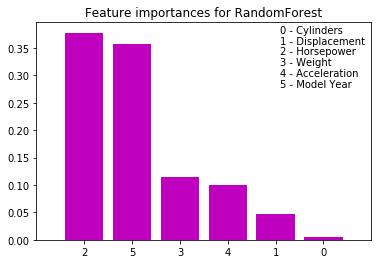

In [59]:
europe = df.loc[df['origin'] == 2]

X = europe.iloc[:, 1 : 7].values.astype('float64')
y = europe.iloc[:, 0].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot_origin(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Na primeru evropskih proizvođača se vidi najveća razlika imeđu klasičnih regresionih metoda i boosting algoritama. Gde se upotrebom boosting algoritama postižu znatno bolje predikcije, dok su predikcije klasičnih regresija praktično beskorisne.

### Predikcija za automobile Azijskih proizvođača - Boosting Algoritmi

AdaBoost => EVS: 0.6202627274899096 MAE: 2.6647884680442218 R^2: 0.6202340760540892
AdaBoost features:
[0.01646318 0.06423831 0.33601415 0.24178869 0.09260575 0.24888993]

0.3360141501629033


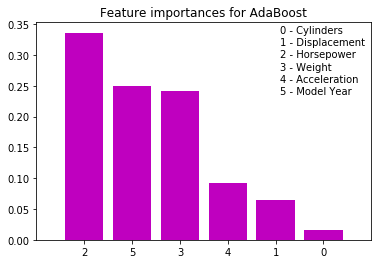

Bagging => EVS: 0.6490797257117353 MAE: 2.4466666666666668 R^2: 0.6490501614619564
{} doesn't have feature_importances_ field property

ExtraTree => EVS: 0.7039911020616663 MAE: 2.419166666666667 R^2: 0.7026493273570145
ExtraTree features:
[0.07900264 0.07508646 0.31921864 0.16054455 0.11083049 0.25531722]

0.31921863988309723


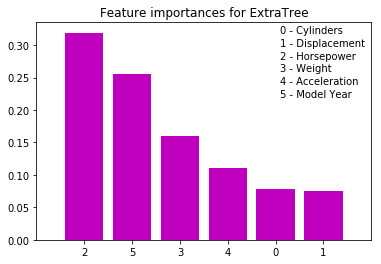

GradientBoosting => EVS: 0.6491733665325677 MAE: 2.5474630678351797 R^2: 0.6491732682968587
GradientBoosting features:
[0.00039619 0.11523737 0.15853783 0.25828041 0.32991673 0.13763147]

0.3299167334512324


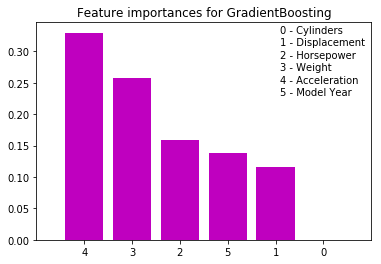

RandomForest => EVS: 0.5446554377796922 MAE: 2.8350000000000004 R^2: 0.5415093429888044
RandomForest features:
[0.00548455 0.04560918 0.58004876 0.0590428  0.19093894 0.11887578]

0.5800487569424421


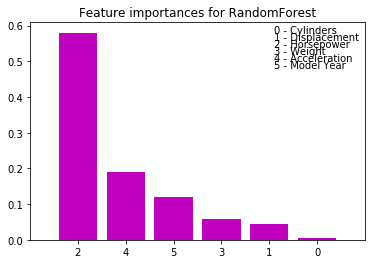

In [60]:
asia = df.loc[df['origin'] == 3]

X = asia.iloc[:, 1 : 7].values.astype('float64')
y = asia.iloc[:, 0].values.astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    r_sqared = stats.get_r_squared(y_test, predictions)
    score = explained_variance_score(y_test, predictions)
    mae = mean_absolute_error(predictions, y_test)
        
    msg = "{} => EVS: {} MAE: {} R^2: {}".format(name, score, mae, r_sqared) 
    print(msg)
    
    if hasattr(model, 'feature_importances_'):
        print("{} features:\n{}\n".format(name, model.feature_importances_))
        get_feature_importance_plot_origin(model, name)
    else:
        print("{} doesn't have feature_importances_ field property\n")

Na primeru azijskih proizvođača boosting algoritmi su takođe postigli bolje rezultate od klasične regresije, ali ne toliko bolje koliko je to na primeru evopskih proizvođača.